In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

In [2]:
np.random.seed(1234)  
PYTHONHASHSEED = 0

In [3]:
train_db = pd.read_csv('input/PM_train.txt', sep=" ", header=None)

test_db = pd.read_csv('input/PM_test.txt', sep=" ", header=None)

train_db.head(100)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,96,-0.0034,0.0001,100.0,518.67,642.19,1584.07,1395.16,14.62,...,8130.69,8.4311,0.03,392,2388,100.0,38.88,23.3255,NaN,NaN
96,1,97,0.0035,-0.0003,100.0,518.67,642.07,1595.77,1407.81,14.62,...,8128.74,8.4105,0.03,392,2388,100.0,39.01,23.2963,NaN,NaN
97,1,98,0.0006,0.0004,100.0,518.67,642.00,1591.11,1404.56,14.62,...,8127.89,8.4012,0.03,391,2388,100.0,38.96,23.2554,NaN,NaN
98,1,99,-0.0005,-0.0000,100.0,518.67,642.46,1592.73,1406.13,14.62,...,8131.77,8.4481,0.03,393,2388,100.0,38.82,23.2323,NaN,NaN


In [4]:
train_db.dropna(axis=1, inplace=True)
test_db.dropna(axis=1, inplace=True)

In [5]:
print(len(train_db))
print(len(test_db))

20631
13096


In [6]:
cols_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_db.columns = cols_names
test_db.columns = cols_names

train_db.head(2)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236


In [7]:
test_db.head(2)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916


In [8]:
truth_df = pd.read_csv('input/PM_truth.txt', sep=" ", header=None)
truth_df.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [9]:
truth_df.dropna(axis=1, inplace=True)
truth_df.head()

,0
0,112
1,98
2,69
3,82
4,91


In [10]:
train_db.sort_values(['id','cycle'], inplace=True)
test_db.sort_values(['id','cycle'], inplace=True)

In [11]:
rul = pd.DataFrame(train_db.groupby('id')['cycle'].max()).reset_index()

# Name the columns and merge them with the training data.
rul.columns = ['id', 'max']
train_db = train_db.merge(rul, on=['id'], how='left')

train_db['RUL'] = train_db['max'] - train_db['cycle']

#The RUL is calculated for each id.
train_db[['id','cycle','max','RUL']].head()

,id,cycle,max,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187


In [12]:
train_db.drop('max', axis=1, inplace=True)

In [13]:
w1 = 30
train_db['failure_within_w1'] = np.where(train_db['RUL'] <= w1, 1, 0 )

In [14]:
train_db['cycle_norm'] = train_db['cycle']


cols_normalize = train_db.columns.difference(['id','cycle','RUL','failure_within_w1'])

# MinMax normalization (from 0 to 1) of sensor data
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_db = pd.DataFrame(min_max_scaler.fit_transform(train_db[cols_normalize]), columns=cols_normalize, 
                             index=train_db.index)

join_df = train_db[['id','cycle','RUL','failure_within_w1']].join(norm_train_db)
train_db = join_df.reindex(columns = train_db.columns)

train_db.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


In [15]:

test_db['cycle_norm'] = test_db['cycle']


norm_test_db = pd.DataFrame(min_max_scaler.transform(test_db[cols_normalize]), columns=cols_normalize, index=test_db.index)


test_join_df = test_db[test_db.columns.difference(cols_normalize)].join(norm_test_db)
test_db = test_join_df.reindex(columns = test_db.columns)
test_db = test_db.reset_index(drop=True)

In [16]:
rul = pd.DataFrame(test_db.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']

# The respective id can be obtained by adding 1 to the index, as the index starts from 0.
truth_df['id'] = truth_df.index + 1

# Add the max cycles given in the test set and the additional RUL given in the ground truth DataFrame.
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)

# Generate the RUL for the test data.
test_db = test_db.merge(truth_df, on=['id'], how='left')
test_db['RUL'] = test_db['max'] - test_db['cycle']
test_db.drop('max', axis=1, inplace=True)

# Generate the label columns w0 and w1 for the test data.
test_db['failure_within_w1'] = np.where(test_db['RUL'] <= w1, 1, 0 )
test_db.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,failure_within_w1
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,...,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142,0
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,...,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141,0
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,...,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140,0
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,...,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139,0
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,...,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138,0


<Axes: >

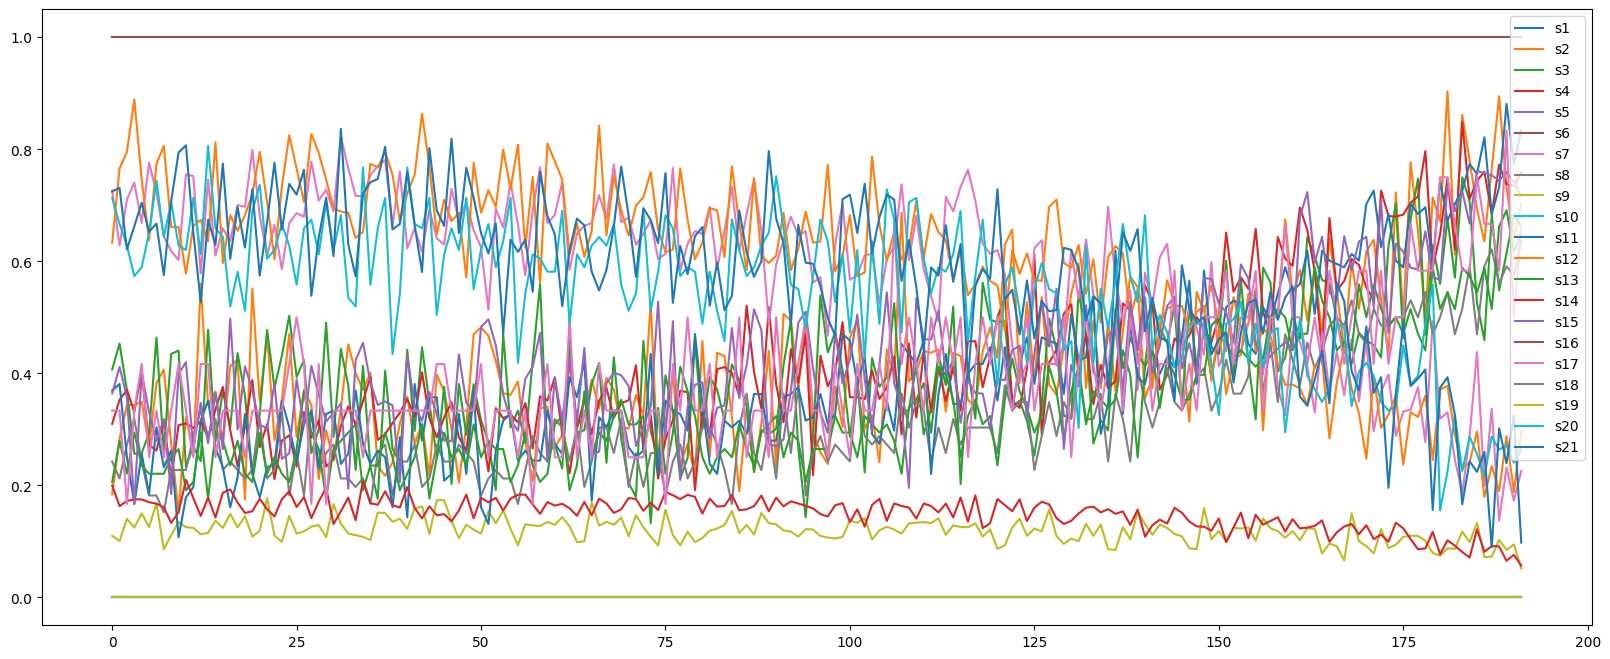

In [17]:
sensor_cols = cols_names[5:]
train_db[train_db.id==1][sensor_cols].plot(figsize=(20, 8))

<Axes: >

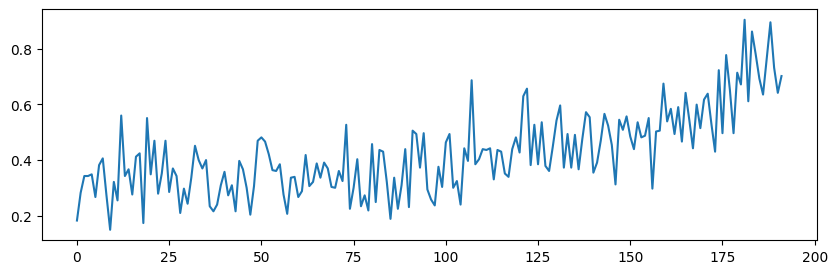

In [18]:
train_db[train_db.id==1][sensor_cols[1]].plot(figsize=(10, 3))

<Axes: >

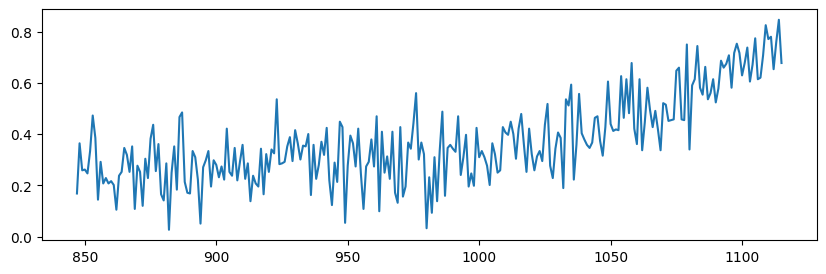

In [19]:
train_db[train_db.id==5][sensor_cols[1]].plot(figsize=(10, 3))

<Axes: >

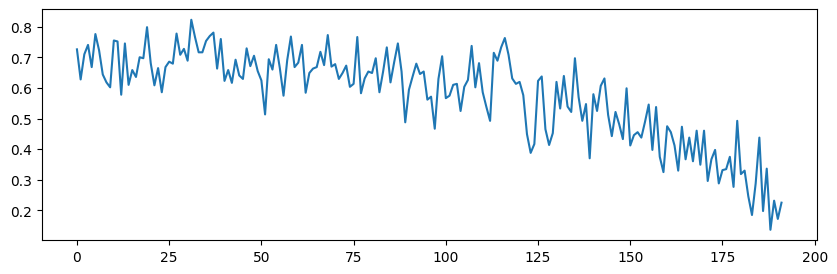

In [20]:
train_db[train_db.id==1][sensor_cols[6]].plot(figsize=(10, 3))

<Axes: >

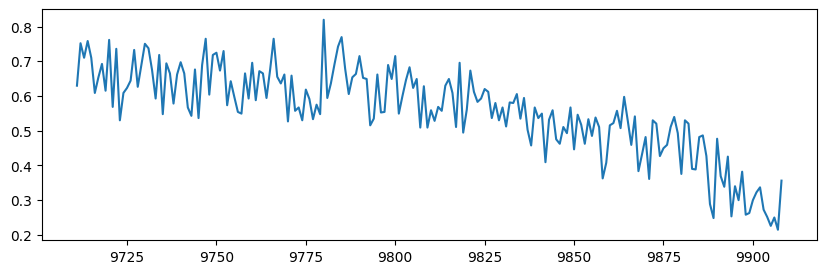

In [21]:
train_db[train_db.id==50][sensor_cols[6]].plot(figsize=(10, 3))

In [22]:
sequence_length = 50

In [23]:
def sequence_generator(feature_df, seq_length, seq_cols):
    # We will not be using any sequence below seq_length.
    # Convert the DataFrame into a NumPy 2D array.
    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]

    # We want to generate sequences of 50 timesteps at a time.
    # Hence, we will iterate over two sets of indices: (0,142),(50,192).
    # For example, id1 has 192 rows, and its sequence_length is equal to 50.
    # 0 50 -> From row 0 to row 50
    # 1 51 -> From row 1 to row 51
    # 2 52 -> From row 2 to row 52
   
    
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]

In [24]:
seq_gen = (list(sequence_generator(train_db[train_db['id']==id], sequence_length, ["s2"])) # We take only one feature (s2).
           for id in train_db['id'].unique())

seq_set = np.concatenate(list(seq_gen)).astype(np.float32)


seq_set.shape

(15631, 50, 1)

In [25]:
def label_generator(label_df, seq_length, label):

    label_array = label_df[label].values
    num_elements = label_array.shape[0]
        
    return label_array[seq_length:num_elements, :]

In [26]:
label_gen = [label_generator(train_db[train_db['id']==id], sequence_length, ['failure_within_w1']) 
             for id in train_db['id'].unique()]
label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

(15631, 1)

In [27]:
out_dim = label_set.shape[1] 
features_dim = seq_set.shape[2] 


print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

RNN_fwd = Sequential()

# Add the RNN unit.
# Understand the parameters.
RNN_fwd.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=1,
         return_sequences=False))
RNN_fwd.add(Dropout(0.2))

RNN_fwd.add(Dense(units=out_dim, activation='sigmoid'))

# Compile the model.
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(RNN_fwd.summary())

# Define the path to save the model.
RNN_fwd_path = 'RNN_fwd.h5'

Features dimension:  1
Output dimension:  1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
import time
epochs = 300
batch_size = 200
start = time.time()

# Fit the network.
RNN_fwd_history = RNN_fwd.fit(seq_set, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/300


75/75 - 3s - loss: 0.6350 - accuracy: 0.7611 - val_loss: 0.6187 - val_accuracy: 0.7788 - 3s/epoch - 34ms/step
Epoch 2/300


c:\Users\Harshith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 1s - loss: 0.6080 - accuracy: 0.7945 - val_loss: 0.5937 - val_accuracy: 0.7980 - 527ms/epoch - 7ms/step
Epoch 3/300
75/75 - 1s - loss: 0.5886 - accuracy: 0.8010 - val_loss: 0.5745 - val_accuracy: 0.8018 - 537ms/epoch - 7ms/step
Epoch 4/300
75/75 - 1s - loss: 0.5716 - accuracy: 0.8017 - val_loss: 0.5599 - val_accuracy: 0.8018 - 531ms/epoch - 7ms/step
Epoch 5/300
75/75 - 2s - loss: 0.5643 - accuracy: 0.8017 - val_loss: 0.5494 - val_accuracy: 0.8018 - 2s/epoch - 26ms/step
Epoch 6/300
75/75 - 1s - loss: 0.5536 - accuracy: 0.8017 - val_loss: 0.5419 - val_accuracy: 0.8018 - 539ms/epoch - 7ms/step
Epoch 7/300
75/75 - 1s - loss: 0.5482 - accuracy: 0.8017 - val_loss: 0.5363 - val_accuracy: 0.8018 - 554ms/epoch - 7ms/step
Epoch 8/300
75/75 - 1s - loss: 0.5466 - accuracy: 0.8017 - val_loss: 0.5320 - val_accuracy: 0.8018 - 522ms/epoch - 7ms/step
Epoch 9/300
75/75 - 1s - loss: 0.5421 - accuracy: 0.8017 - val_loss: 0.5286 - val_accuracy: 0.8018 - 522ms/epoch - 7ms/step
Epoch 10/300
75/75 - 1

In [29]:
def plot_model_accuracy(model_name_history, width = 10, height = 10):

  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['accuracy'])
  plt.plot(model_name_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

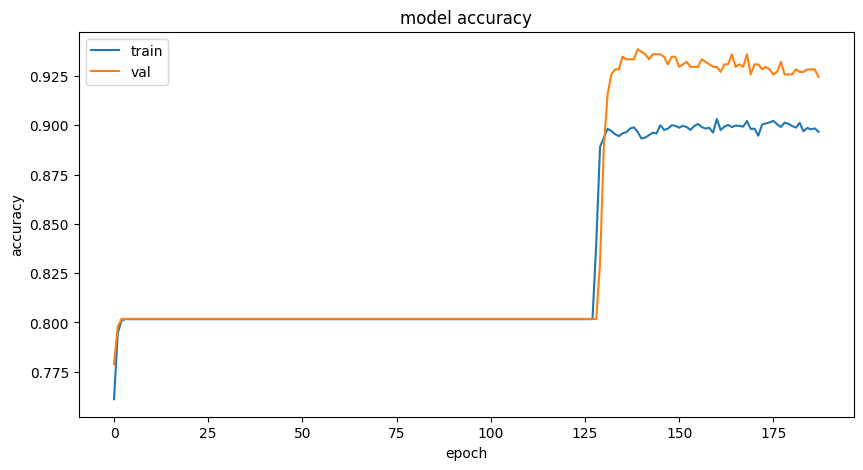

In [30]:
plot_model_accuracy(RNN_fwd_history,10,5)

In [31]:
def plot_training_curve(model_name_history, width = 10, height = 10):
  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['loss'])
  plt.plot(model_name_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

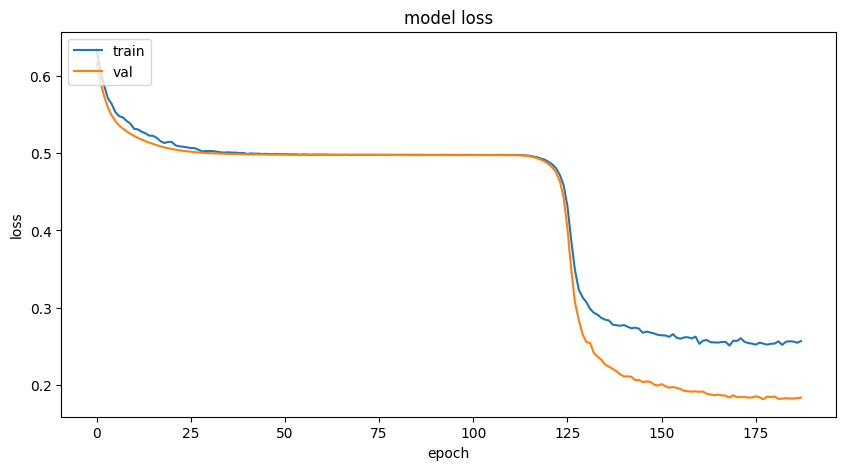

In [32]:
plot_training_curve(RNN_fwd_history,10,5)

In [33]:
def analyze_model_on_train_set(input_sequence_set, model_name):

  # The training metrics are as follows:
  model_history_scores = model_name.evaluate(input_sequence_set, label_set, verbose=1, batch_size=50)
  print('Train Accurracy: {}'.format(model_history_scores[1]))

  # Make predictions and compute the confusion matrix.
  y_pred = (model_name.predict(input_sequence_set, verbose=1, batch_size=200) > 0.5).astype("int32")
  y_true = label_set

  test_set = pd.DataFrame(y_pred)
  test_set.to_csv('binary_submit_train.csv', index = None)

  print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
  model_cm = confusion_matrix(y_true, y_pred)
  print(model_cm)

  # Compute the precision and recall.
  model_precision = precision_score(y_true, y_pred)
  model_recall = recall_score(y_true, y_pred)
  print( 'Train Precision = ', model_precision, '\n', 'Train Recall = ', model_recall)

# Call the function.
analyze_model_on_train_set(seq_set, RNN_fwd)

313/313 [==============================] - 1s 3ms/step - loss: 0.2004 - accuracy: 0.9258
Train Accurracy: 0.9257885217666626
79/79 [==============================] - 0s 3ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12116   415]
 [  745  2355]]
Train Precision =  0.8501805054151624 
 Train Recall =  0.7596774193548387


In [34]:
def analyze_model_on_test_set(input_sequence_columns, model_path, width= 10, height=5):

  last_test_seq = [test_db[test_db['id']==id][input_sequence_columns].values[-sequence_length:] 
                        for id in test_db['id'].unique() if len(test_db[test_db['id']==id]) >= sequence_length]
  last_test_seq = np.asarray(last_test_seq).astype(np.float32)
  
  # Get the labels of the test set.
  y_mask = [len(test_db[test_db['id']==id]) >= sequence_length for id in test_db['id'].unique()]
  last_test_label = test_db.groupby('id')['failure_within_w1'].nth(-1)[y_mask].values
  last_test_label = last_test_label.reshape(last_test_label.shape[0],1).astype(np.float32)

  # If the best model weights were saved, load them.
  if os.path.isfile(model_path):
    print("using " + model_path)
    model_estimator = load_model(model_path)

  # Test the metrics.
  start = time.time()
  scores_test = model_estimator.evaluate(last_test_seq, last_test_label, verbose=2)
  end = time.time()
  print("Total time taken for inferencing: ", "{:.2f}".format((end-start)), " secs")

  print('Test Accurracy: {}'.format(scores_test[1]))

  # Make predictions and compute the confusion matrix.
  y_model_estimator_pred_test = (model_estimator.predict(last_test_seq) >0.5).astype("int32")
  y_true_test = last_test_label

  test_set = pd.DataFrame(y_model_estimator_pred_test)
  test_set.to_csv('binary_submit_test.csv', index = None)

  print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
  model_estimator_conf_m = confusion_matrix(y_true_test, y_model_estimator_pred_test)
  print(model_estimator_conf_m)

  # Compute the precision and recall values.
  model_estimator_precision_test = precision_score(y_true_test, y_model_estimator_pred_test)
  model_estimator_recall_test = recall_score(y_true_test, y_model_estimator_pred_test)
  f1_test = 2 * (model_estimator_precision_test * model_estimator_recall_test) / (model_estimator_precision_test + model_estimator_recall_test)
  print( 'Test Precision: ', model_estimator_precision_test, '\n', 'Test Recall: ', model_estimator_recall_test,'\n', 'Test F1-score:', f1_test )

  
  fig_verify = plt.figure(figsize=(10, 5))
  plt.plot(y_model_estimator_pred_test, color="blue")
  plt.plot(y_true_test, color="green")
  plt.title('prediction')
  plt.ylabel('value')
  plt.xlabel('row')
  plt.legend(['predicted', 'actual data'], loc='upper left')
  plt.show()

using RNN_fwd.h5
3/3 - 0s - loss: 0.2820 - accuracy: 0.9032 - 221ms/epoch - 74ms/step
Total time taken for inferencing:  0.28  secs
Test Accurracy: 0.9032257795333862
3/3 [==============================] - 0s 8ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[67  1]
 [ 8 17]]
Test Precision:  0.9444444444444444 
 Test Recall:  0.68 
 Test F1-score: 0.7906976744186047


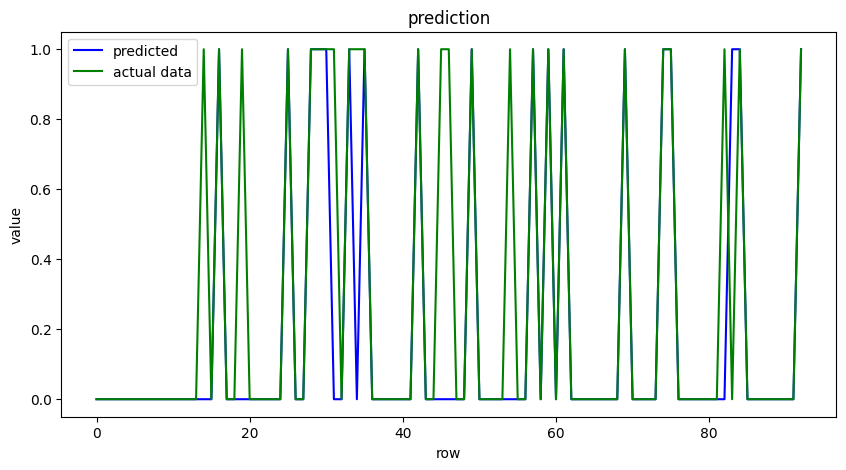

In [35]:
analyze_model_on_test_set(["s2"], RNN_fwd_path, 10, 5)

In [36]:
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols_25 = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols_25.extend(sensor_cols)

In [37]:
seq_gen = (list(sequence_generator(train_db[train_db['id']==id], sequence_length, sequence_cols_25)) #We will take all the features (25).
           for id in train_db['id'].unique())

seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)


seq_set_f25.shape

(15631, 50, 25)

In [38]:
features_dim = seq_set_f25.shape[2] # number of features (25).
out_dim = label_set.shape[1] # One label (failure_within_w1).

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

RNN_fwd_2 = Sequential()



RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))

RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))

RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))

# Compile the model.
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(RNN_fwd_2.summary())

# Define the path to save the model.
RNN_fwd_2_path = 'RNN_fwd_2.h5'

Features dimension:  25
Output dimension:  1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 5)             155       
                                                                 
 dropout_1 (Dropout)         (None, 50, 5)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3)                 27        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 186 (744.00 Byte)
Trainable params: 186 (744.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

In [39]:
import time
epochs = 200
batch_size = 200
start = time.time()

# Fit the network.
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/200
75/75 - 3s - loss: 0.5021 - accuracy: 0.7971 - val_loss: 0.4319 - val_accuracy: 0.8018 - 3s/epoch - 43ms/step
Epoch 2/200


c:\Users\Harshith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 1s - loss: 0.4064 - accuracy: 0.8222 - val_loss: 0.3189 - val_accuracy: 0.8018 - 1s/epoch - 14ms/step
Epoch 3/200
75/75 - 1s - loss: 0.3245 - accuracy: 0.8749 - val_loss: 0.2612 - val_accuracy: 0.9297 - 1s/epoch - 14ms/step
Epoch 4/200
75/75 - 1s - loss: 0.2730 - accuracy: 0.9042 - val_loss: 0.2166 - val_accuracy: 0.9309 - 990ms/epoch - 13ms/step
Epoch 5/200
75/75 - 1s - loss: 0.2277 - accuracy: 0.9286 - val_loss: 0.2016 - val_accuracy: 0.9322 - 985ms/epoch - 13ms/step
Epoch 6/200
75/75 - 1s - loss: 0.2047 - accuracy: 0.9364 - val_loss: 0.1761 - val_accuracy: 0.9361 - 1s/epoch - 13ms/step
Epoch 7/200
75/75 - 1s - loss: 0.1899 - accuracy: 0.9393 - val_loss: 0.1684 - val_accuracy: 0.9437 - 1s/epoch - 13ms/step
Epoch 8/200
75/75 - 1s - loss: 0.1851 - accuracy: 0.9397 - val_loss: 0.1628 - val_accuracy: 0.9412 - 1s/epoch - 14ms/step
Epoch 9/200
75/75 - 1s - loss: 0.1841 - accuracy: 0.9400 - val_loss: 0.1741 - val_accuracy: 0.9348 - 959ms/epoch - 13ms/step
Epoch 10/200
75/75 - 1s - l

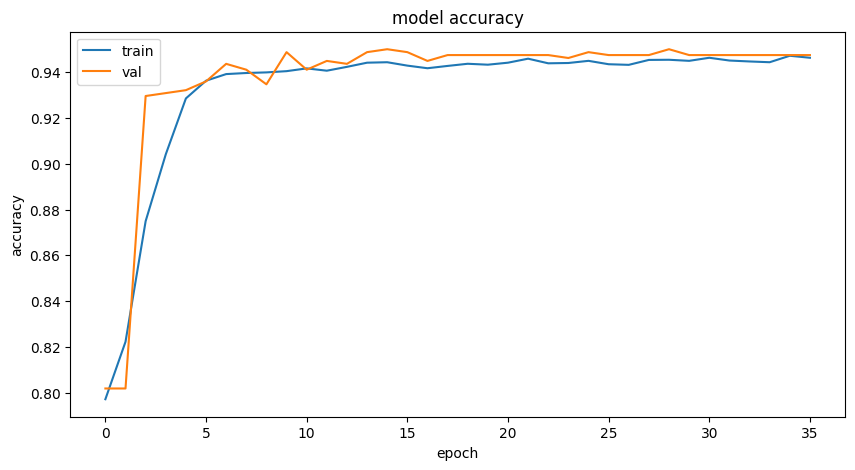

In [40]:
plot_model_accuracy(RNN_fwd_2_history, 10, 5)

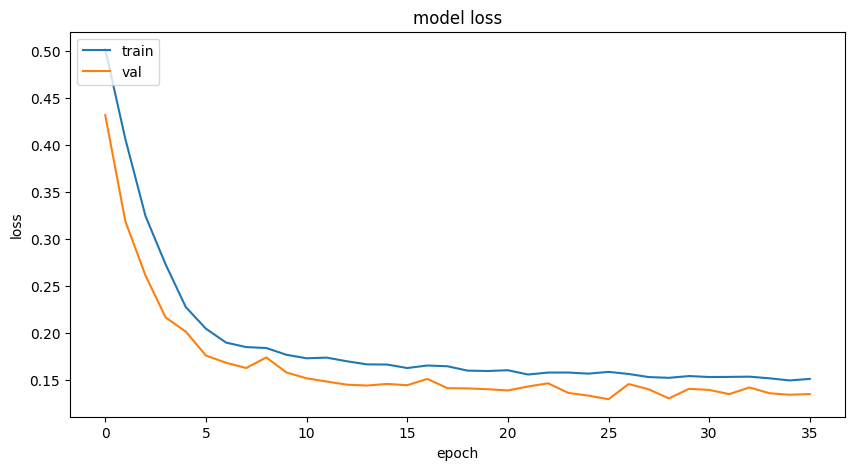

In [41]:
plot_training_curve(RNN_fwd_2_history,10,5)


In [42]:
analyze_model_on_train_set(seq_set_f25, RNN_fwd_2)


313/313 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9508
Train Accurracy: 0.9508028626441956
79/79 [==============================] - 1s 6ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12267   264]
 [  505  2595]]
Train Precision =  0.9076600209863589 
 Train Recall =  0.8370967741935483


using RNN_fwd_2.h5
3/3 - 0s - loss: 0.2265 - accuracy: 0.9140 - 425ms/epoch - 142ms/step
Total time taken for inferencing:  0.47  secs
Test Accurracy: 0.9139785170555115
3/3 [==============================] - 0s 3ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[67  1]
 [ 7 18]]
Test Precision:  0.9473684210526315 
 Test Recall:  0.72 
 Test F1-score: 0.8181818181818181


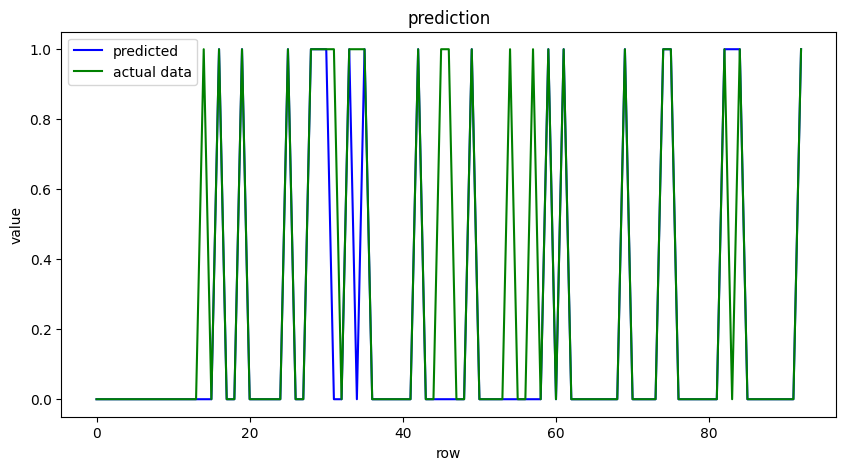

In [43]:
analyze_model_on_test_set(sequence_cols_25, RNN_fwd_2_path, 10, 5)

In [44]:
from tensorflow.keras.layers import Bidirectional

features_dim = seq_set_f25.shape[2] # Number of features (25)
out_dim = label_set.shape[1] 

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

RNN_bi = Sequential()



RNN_bi.add(Bidirectional( 
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))

RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))

RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))


RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

RNN_bi_path = 'RNN_bi.h5'

Features dimension:  25
Output dimension:  1


In [45]:
import time
epochs = 200
batch_size = 200
start = time.time()

# Fit the network
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/200
75/75 - 5s - loss: 0.5586 - accuracy: 0.7248 - val_loss: 0.4124 - val_accuracy: 0.8018 - 5s/epoch - 69ms/step
Epoch 2/200


c:\Users\Harshith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 1s - loss: 0.3900 - accuracy: 0.8307 - val_loss: 0.3597 - val_accuracy: 0.8402 - 1s/epoch - 16ms/step
Epoch 3/200
75/75 - 1s - loss: 0.3378 - accuracy: 0.8734 - val_loss: 0.3288 - val_accuracy: 0.8926 - 1s/epoch - 17ms/step
Epoch 4/200
75/75 - 1s - loss: 0.3133 - accuracy: 0.8918 - val_loss: 0.3102 - val_accuracy: 0.8964 - 1s/epoch - 16ms/step
Epoch 5/200
75/75 - 1s - loss: 0.2948 - accuracy: 0.8960 - val_loss: 0.2845 - val_accuracy: 0.9041 - 1s/epoch - 15ms/step
Epoch 6/200
75/75 - 1s - loss: 0.2669 - accuracy: 0.9040 - val_loss: 0.2643 - val_accuracy: 0.9079 - 1s/epoch - 16ms/step
Epoch 7/200
75/75 - 1s - loss: 0.2473 - accuracy: 0.9113 - val_loss: 0.2507 - val_accuracy: 0.9143 - 1s/epoch - 15ms/step
Epoch 8/200
75/75 - 1s - loss: 0.2330 - accuracy: 0.9210 - val_loss: 0.2323 - val_accuracy: 0.9258 - 1s/epoch - 17ms/step
Epoch 9/200
75/75 - 1s - loss: 0.2186 - accuracy: 0.9256 - val_loss: 0.2182 - val_accuracy: 0.9207 - 1s/epoch - 17ms/step
Epoch 10/200
75/75 - 1s - loss: 0.21

In [46]:
print(RNN_bi.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 50, 12)            384       
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 50, 12)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3)                 48        
                                                                 
 dropout_4 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 436 (1.70 KB)
Trainable params: 436 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

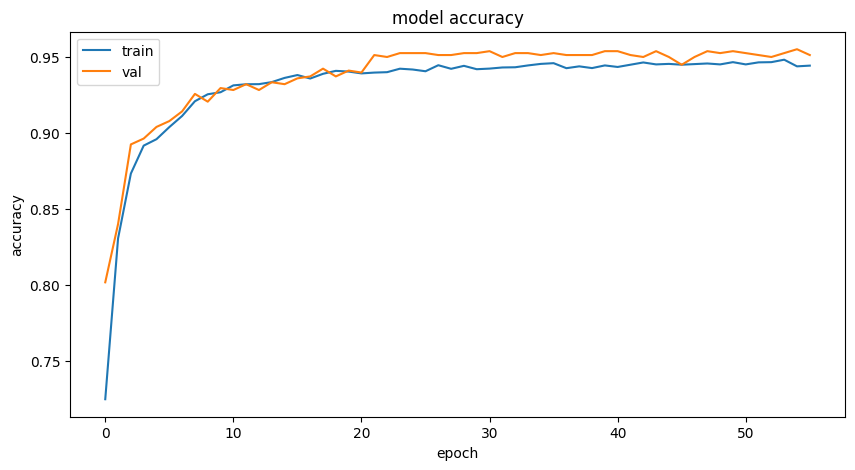

In [47]:
plot_model_accuracy(RNN_bi_history,10,5)

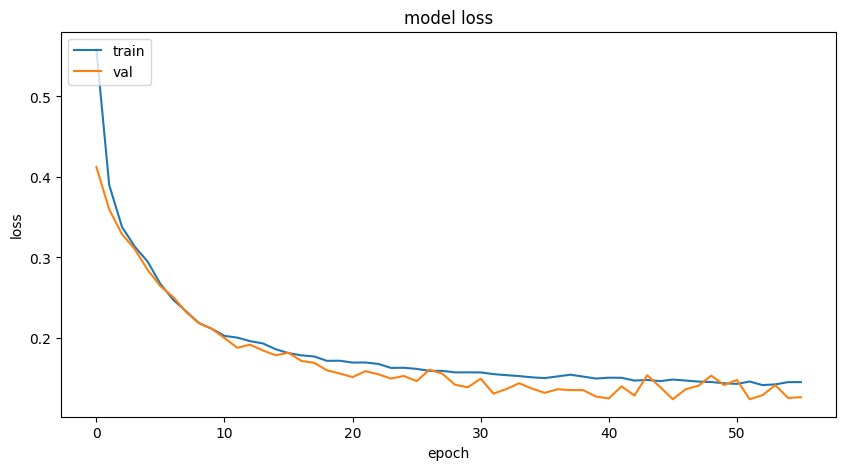

In [48]:
plot_training_curve(RNN_bi_history,10,5)

In [49]:
analyze_model_on_train_set(seq_set_f25, RNN_bi)

313/313 [==============================] - 2s 6ms/step - loss: 0.1095 - accuracy: 0.9552
Train Accurracy: 0.955217182636261
79/79 [==============================] - 1s 7ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12196   335]
 [  365  2735]]
Train Precision =  0.8908794788273615 
 Train Recall =  0.882258064516129


using RNN_bi.h5
3/3 - 0s - loss: 0.1812 - accuracy: 0.9355 - 433ms/epoch - 144ms/step
Total time taken for inferencing:  0.49  secs
Test Accurracy: 0.9354838728904724
3/3 [==============================] - 0s 0s/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[66  2]
 [ 4 21]]
Test Precision:  0.9130434782608695 
 Test Recall:  0.84 
 Test F1-score: 0.8749999999999999


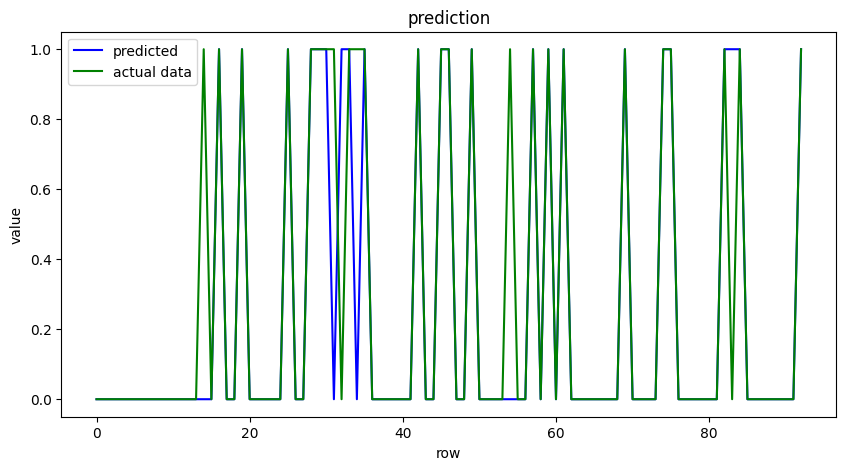

In [50]:
analyze_model_on_test_set(sequence_cols_25, RNN_bi_path,10,5)

In [51]:
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1] 

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

model = Sequential()


model.add(LSTM(
         input_shape=(sequence_length, features_dim),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=out_dim, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model_path = 'binary_model.h5'

Features dimension:  25
Output dimension:  1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           50400     
                                                                 
 dropout_5 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 80651 (315.04 KB)
Trainable params: 80651 (315.04 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

In [52]:
import time
epochs = 200
batch_size = 200
start = time.time()

# Fit the network
history = model.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Epoch 1/200
75/75 - 14s - loss: 0.2637 - accuracy: 0.8900 - val_loss: 0.1168 - val_accuracy: 0.9565 - 14s/epoch - 185ms/step
Epoch 2/200


c:\Users\Harshith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 8s - loss: 0.0976 - accuracy: 0.9613 - val_loss: 0.0530 - val_accuracy: 0.9757 - 8s/epoch - 111ms/step
Epoch 3/200
75/75 - 9s - loss: 0.0793 - accuracy: 0.9680 - val_loss: 0.0582 - val_accuracy: 0.9770 - 9s/epoch - 121ms/step
Epoch 4/200
75/75 - 10s - loss: 0.0822 - accuracy: 0.9671 - val_loss: 0.0616 - val_accuracy: 0.9731 - 10s/epoch - 128ms/step
Epoch 5/200
75/75 - 10s - loss: 0.0684 - accuracy: 0.9713 - val_loss: 0.0543 - val_accuracy: 0.9834 - 10s/epoch - 136ms/step
Epoch 6/200


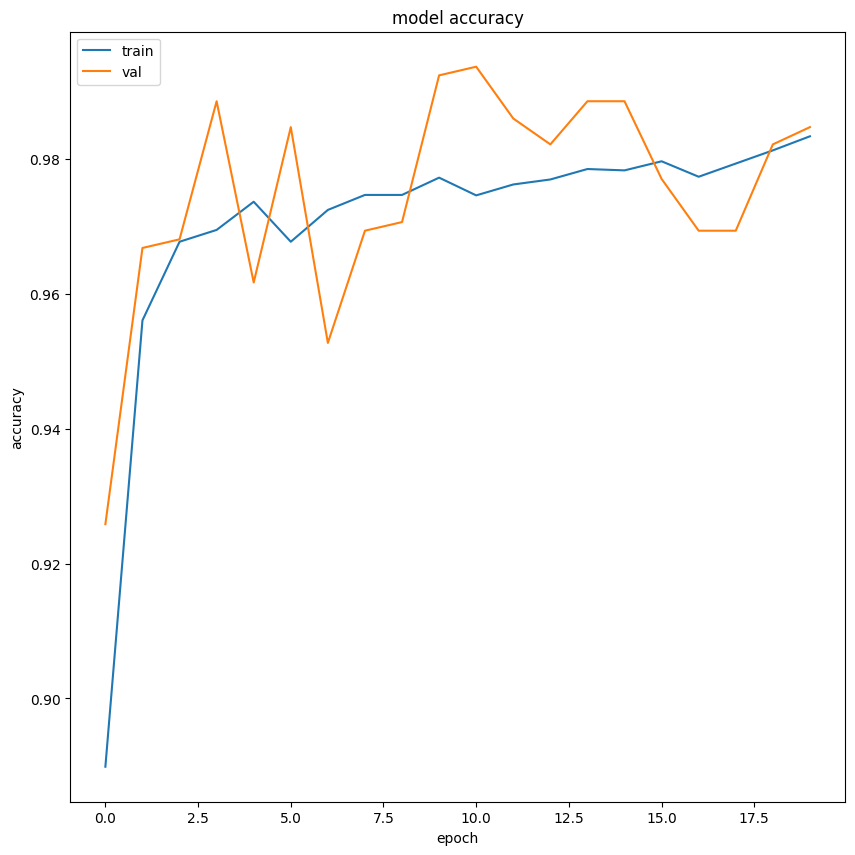

In [ ]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

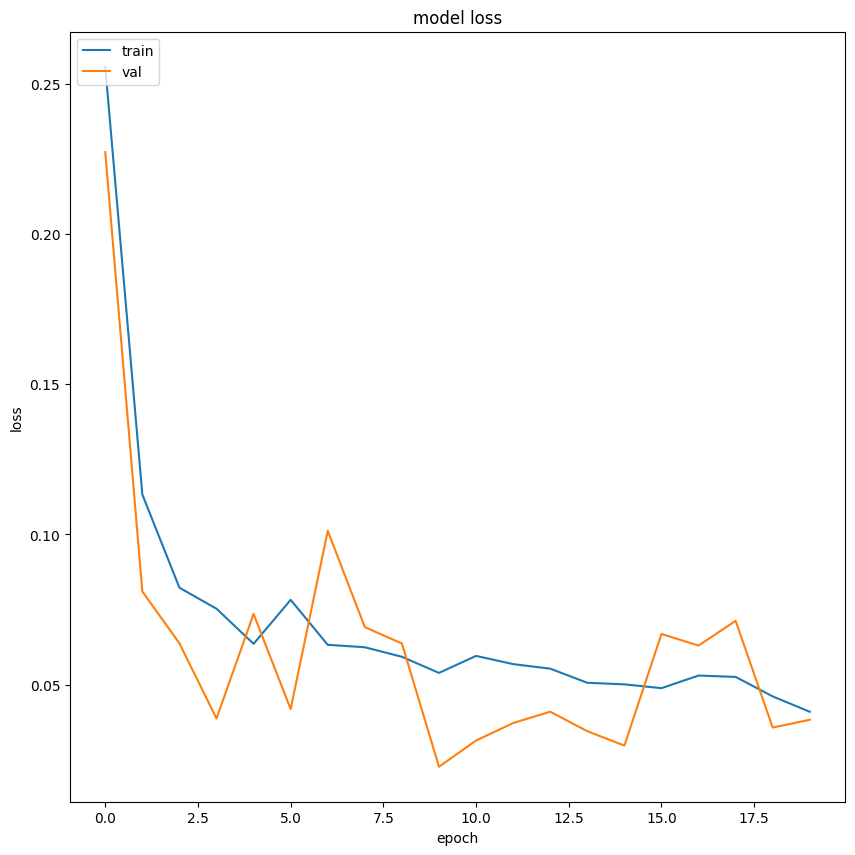

In [ ]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(seq_set_f25, label_set, verbose=1, batch_size=50)
print('Train Accurracy: {}'.format(scores[1]))

# Make predictions and compute confusion matrix
y_pred = (model.predict(seq_set_f25, verbose=1, batch_size=200) > 0.5).astype("int32")
y_true = label_set

test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)


precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'Train Precision = ', precision, '\n', 'Train Recall = ', recall)

313/313 [==============================] - 7s 22ms/step - loss: 0.0410 - accuracy: 0.9823
Train Accurracy: 0.9822788238525391
79/79 [==============================] - 5s 50ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12477    54]
 [  223  2877]]
Train Precision =  0.9815762538382804 
 Train Recall =  0.9280645161290323


3/3 - 1s - loss: 0.0319 - accuracy: 0.9892 - 1s/epoch - 406ms/step
Total time taken for inferencing:  1.31  secs
Test Accurracy: 0.9892473220825195
3/3 [==============================] - 1s 19ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[68  0]
 [ 1 24]]
Test Precision:  1.0 
 Test Recall:  0.96 
 Test F1-score: 0.9795918367346939


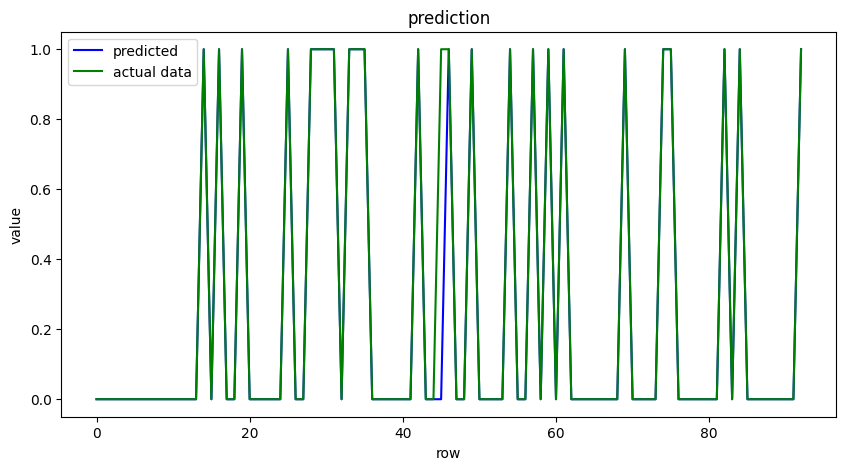

In [ ]:
last_test_seq = [test_db[test_db['id']==id][sequence_cols_25].values[-sequence_length:] 
                       for id in test_db['id'].unique() if len(test_db[test_db['id']==id]) >= sequence_length]
last_test_seq = np.asarray(last_test_seq).astype(np.float32)


y_mask = [len(test_db[test_db['id']==id]) >= sequence_length for id in test_db['id'].unique()]
last_test_label = test_db.groupby('id')['failure_within_w1'].nth(-1)[y_mask].values
last_test_label = last_test_label.reshape(last_test_label.shape[0],1).astype(np.float32)


if os.path.isfile(model_path):
    estimator = load_model(model_path)


start = time.time()
scores_test = estimator.evaluate(last_test_seq, last_test_label, verbose=2)
end = time.time()
print("Total time taken for inferencing: ", "{:.2f}".format((end-start)), " secs")

print('Test Accurracy: {}'.format(scores_test[1]))


y_pred_test = (estimator.predict(last_test_seq) > 0.5).astype("int32")
y_true_test = last_test_label

test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('binary_submit_test.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
conf_m = confusion_matrix(y_true_test, y_pred_test)
print(conf_m)


precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Test Precision: ', precision_test, '\n', 'Test Recall: ', recall_test,'\n', 'Test F1-score:', f1_test )

fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color="blue")
plt.plot(y_true_test, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['predicted', 'actual data'], loc='upper left')
plt.show()